In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 30)
plt.style.use('ggplot')

In [53]:
df = pd.read_csv("Cleaned Dataset.csv", parse_dates=['Created_Date'])
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Created_Date
0,1.0,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,Music,1.0,1,1,2.258000e+09,564600,9000000,6800000,108400000,2000000.0,28.1,1366417754,5.36,471031528,20.593684,78.962880,2006-03-13
1,2.0,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,50.0,1,1,1.348000e+09,337000,5400000,4000000,64700000,8000000.0,88.2,328239523,14.70,270663028,37.090240,-95.712891,2012-02-20
2,3.0,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2,1,1.975000e+09,493800,7900000,5900000,94800000,1000000.0,88.2,328239523,14.70,270663028,37.090240,-95.712891,2006-09-01
3,4.0,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,3.0,2,2,1.824000e+09,455900,7300000,5500000,87500000,1000000.0,28.1,1366417754,5.36,471031528,20.593684,78.962880,2006-09-20
4,5.0,Kids Diana Show,112000000,93247040539,People & Blogs,Kids Diana Show,1111,United States,US,Entertainment,5.0,3,3,7.316740e+08,182900,2900000,2200000,35100000,NaN,88.2,328239523,14.70,270663028,37.090240,-95.712891,2015-05-12


In [54]:
# Filling 1 missing value in 'Youtuber' and 'Title' upon Internet research
df['Youtuber'].fillna('Cognizer', inplace=True)
df['Title'].fillna('Cognizer', inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   rank                                     973 non-null    float64       
 1   Youtuber                                 973 non-null    object        
 2   subscribers                              973 non-null    int64         
 3   video views                              973 non-null    int64         
 4   category                                 973 non-null    object        
 5   Title                                    973 non-null    object        
 6   uploads                                  973 non-null    int64         
 7   Country                                  973 non-null    object        
 8   Abbreviation                             973 non-null    object        
 9   channel_type                             97

---

### 8. What is the overall trend in subscribers gained in the last 30 days across all channels?

In [56]:
df.groupby('channel_type')['subscribers_for_last_30_days'].sum()

channel_type
Animals           2300005.0
Autos              500011.0
Comedy           14500258.0
Education        11900000.0
Entertainment    91040660.0
Film             10601031.0
Games            17606614.0
Howto             3800003.0
Music            28910422.0
News              7030000.0
Nonprofit          500000.0
People           31104890.0
Sports            4900001.0
Tech              3200032.0
Name: subscribers_for_last_30_days, dtype: float64

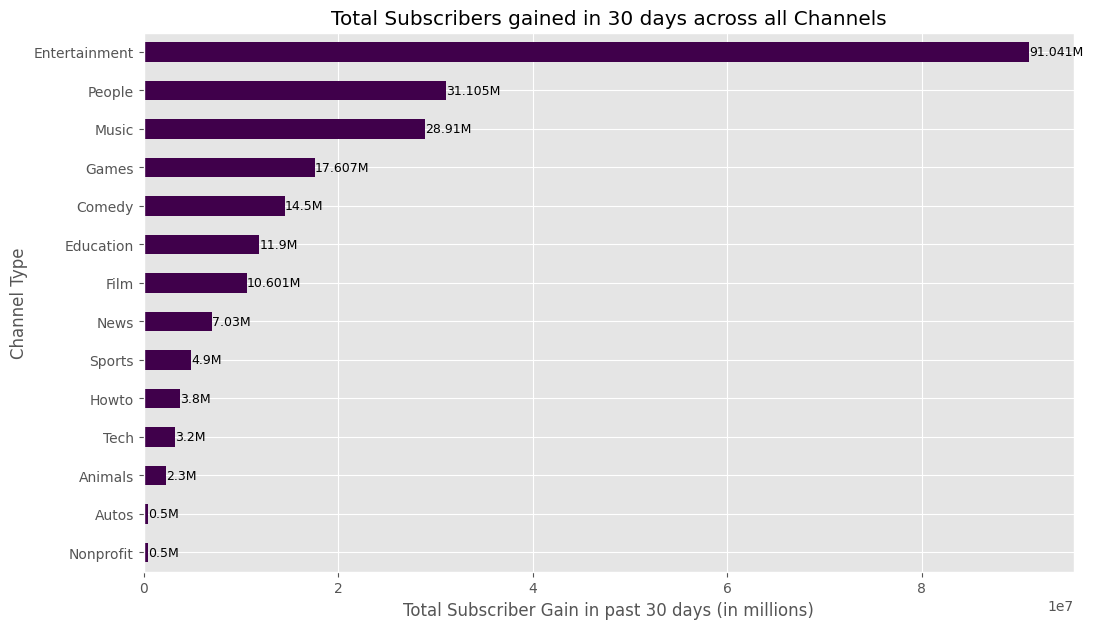

In [57]:
df.groupby('channel_type')['subscribers_for_last_30_days'].sum().sort_values().plot(kind='barh', 
                                                                                    title='Total Subscribers gained in 30 days across all Channels', 
                                                                                    colormap='PRGn', 
                                                                                    figsize=(12,7))

for i,j in enumerate(df.groupby('channel_type')['subscribers_for_last_30_days'].sum().sort_values(ascending=False)):
    plt.text(j, 13-i, f"{round(j/1000000, 3)}M", va='center', fontsize=9, color='black')

plt.xlabel('Total Subscriber Gain in past 30 days (in millions)')
plt.ylabel('Channel Type')
plt.show()

---

### 9. Are there any outliers in terms of yearly earnings from YouTube channels?

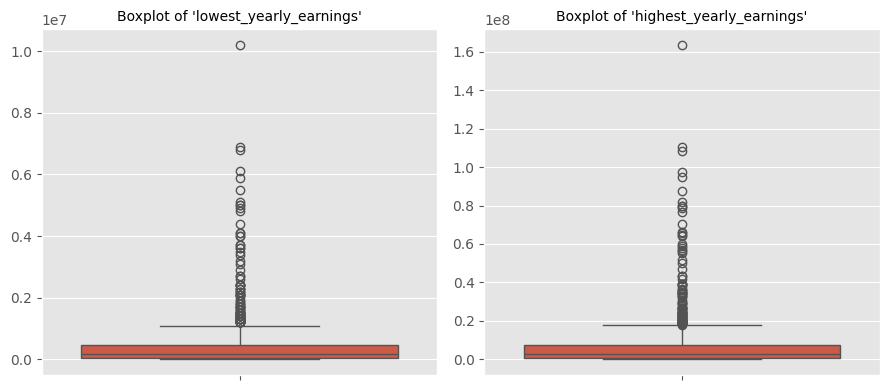

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(9,4))

sns.boxplot(df, y='lowest_yearly_earnings', ax=ax[0])
sns.boxplot(df, y='highest_yearly_earnings', ax=ax[1])

ax[0].set_title("Boxplot of 'lowest_yearly_earnings'", fontsize=10)
ax[0].set_ylabel('')
ax[1].set_title("Boxplot of 'highest_yearly_earnings'", fontsize=10)
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

#### Although there are many outliers, 1 data point stands out from the rest. Looking into that..

In [59]:
df[df['lowest_yearly_earnings'] > 10000000]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Created_Date
488,493.5,KIMPRO,17700000,19206701832,People & Blogs,KIMPRO,1646,South Korea,KR,People,133.0,12,46,3.404000e+09,850900,13600000,10200000,163400000,3200000.0,94.3,51709098,4.15,42106719,35.907757,127.766922,2017-11-11


In [60]:
df[df['highest_yearly_earnings'] > 160000000]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Created_Date
488,493.5,KIMPRO,17700000,19206701832,People & Blogs,KIMPRO,1646,South Korea,KR,People,133.0,12,46,3.404000e+09,850900,13600000,10200000,163400000,3200000.0,94.3,51709098,4.15,42106719,35.907757,127.766922,2017-11-11


#### I've reviewed this channel. While I'm unsure of the dataset's extraction date, as of now, KIMPRO stands as the third-largest YouTube channel in terms of subscribers. It's yearly earnings surpass those of BlackPink and HYBE, which rank first and second in subscriber count. 

#### So although it is far away from the rest it's not a random mistake or anomaly which needs to be removed from dataset.

---

### 10. What is the distribution of channel creation dates? Is there any trend over time?

In [61]:
# The official YouTube channel was created in 1970 (Yes it's true)
# Excluding only this record and plotting distribution.
df[df['Youtuber'] == 'YouTube']

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Created_Date
98,99.0,YouTube,36300000,3010784935,News & Politics,YouTube,744,United States,US,Entertainment,827.0,33,28,21103000.0,5300,84400,63300,1000000,300000.0,88.2,328239523,14.7,270663028,37.09024,-95.712891,1970-01-01


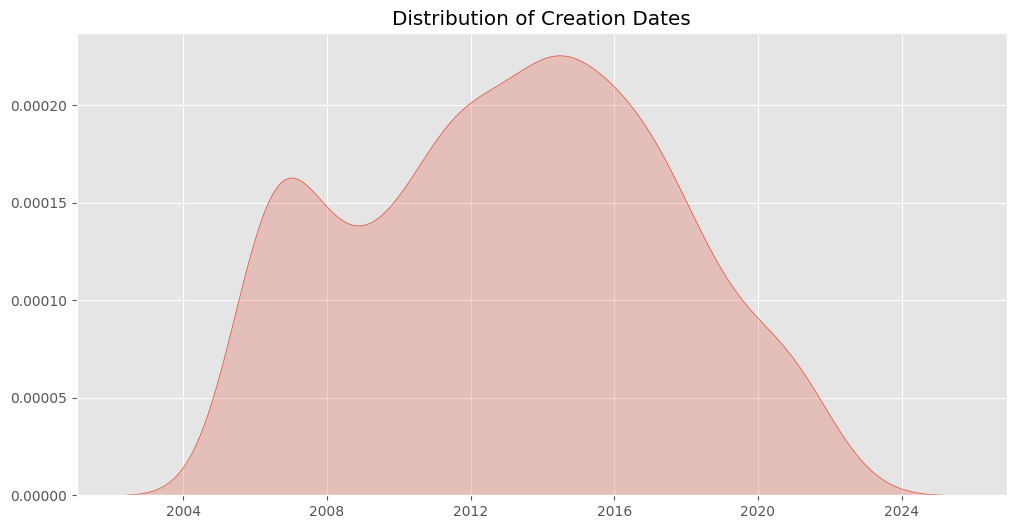

In [62]:
plt.figure(figsize=(12,6))
sns.kdeplot(df.drop(98, axis=0), x='Created_Date', fill=True)
plt.title('Distribution of Creation Dates')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Since its inception in 2005, YouTube has witnessed a surge in channel creation. However, the peak of this growth occurred during the period of 2014-2015, characterized by the rapid expansion of social media and the widespread adoption of smartphones. This era marked a significant increase in accessibility to YouTube and its vast array of videos.

---

### 11. Is there a relationship between gross tertiary education enrollment and the number of YouTube channels in a country?

In [63]:
df['Gross tertiary education enrollment (%)'].value_counts().head()

Gross tertiary education enrollment (%)
88.2    338
28.1    200
51.3     68
60.0     46
40.2     40
Name: count, dtype: int64

#### I have plotted Scatter Plot between Gross tertiary education enrollment and frequncy of enrollment percentage to see if there's any correlation between the two.

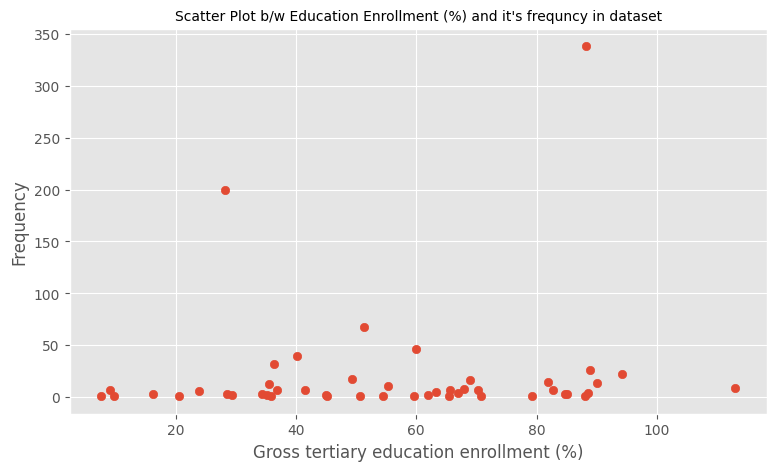

In [64]:
plt.figure(figsize=(9, 5))
plt.scatter(df['Gross tertiary education enrollment (%)'].value_counts().index, 
            df['Gross tertiary education enrollment (%)'].value_counts().values)
plt.title("Scatter Plot b/w Education Enrollment (%) and it's frequncy in dataset", fontsize=10)
plt.xlabel('Gross tertiary education enrollment (%)')
plt.ylabel('Frequency')
plt.show()

#### There is no particular relationship between gross tertiary education enrollment and the number of YouTube channels in a country. The country with most number of youtube channels was United States with 88.2% Tertiary Education Enrollment. It can also be seen in scatter plot above. The second highest is India with 28.1%. We can observe that irrespective of how high or low the education enrollment percentage is the number of youtube channels is not dependent on it at all. It's not like highest Education Enrollment has highest youtube channels (for example Australia has highest Gross tertiary education enrollment of 113.1% but still has low number of youtube channels) and lowest has low. 

---

### 12. How does the unemployment rate vary among the top 10 countries with the highest number of YouTube channels?

In [65]:
top10_countries = list(df['Country'].value_counts().head(10).index)
print(top10_countries)

['United States', 'India', 'Brazil', 'United Kingdom', 'Mexico', 'Indonesia', 'Spain', 'South Korea', 'Thailand', 'Canada']


In [66]:
country_unemp_dict = {}
for i in top10_countries:
    country_unemp_dict[i] = df[df['Country'] == i].iloc[0]['Unemployment rate']

print(country_unemp_dict)

{'United States': 14.7, 'India': 5.36, 'Brazil': 12.08, 'United Kingdom': 3.85, 'Mexico': 3.42, 'Indonesia': 4.69, 'Spain': 13.96, 'South Korea': 4.15, 'Thailand': 0.75, 'Canada': 5.56}


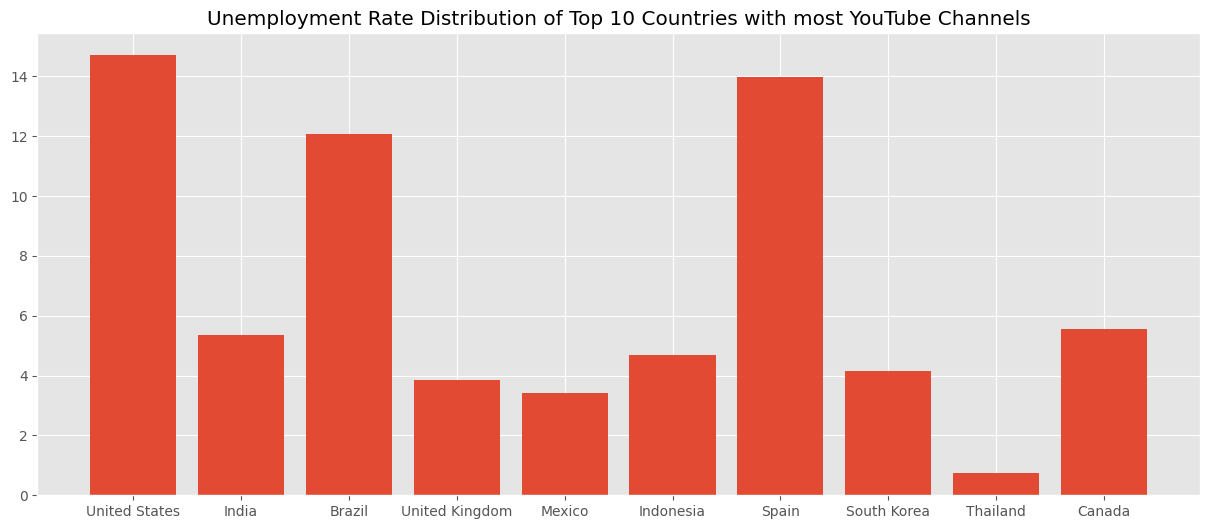

In [67]:
plt.figure(figsize=(15, 6))
plt.bar(x=np.arange(1, 11), height=list(country_unemp_dict.values()))
plt.xticks(ticks=np.arange(1, 11), labels=list(country_unemp_dict.keys()))
plt.title('Unemployment Rate Distribution of Top 10 Countries with most YouTube Channels')
plt.show()

#### United States has highest unemployment rate followed by Spain and Brazil. Thailand has least unemployment rate.

---

### 13. What is the average urban population percentage in countries with YouTube channels?

In [68]:
a = 100*df.groupby('Country')['Urban_population'].mean()/df.groupby('Country')['Population'].mean()
a.sort_values(ascending=False).head()

Country
Singapore      100.000000
Kuwait         100.000000
Argentina       91.991001
Netherlands     91.875998
Japan           91.725869
dtype: float64

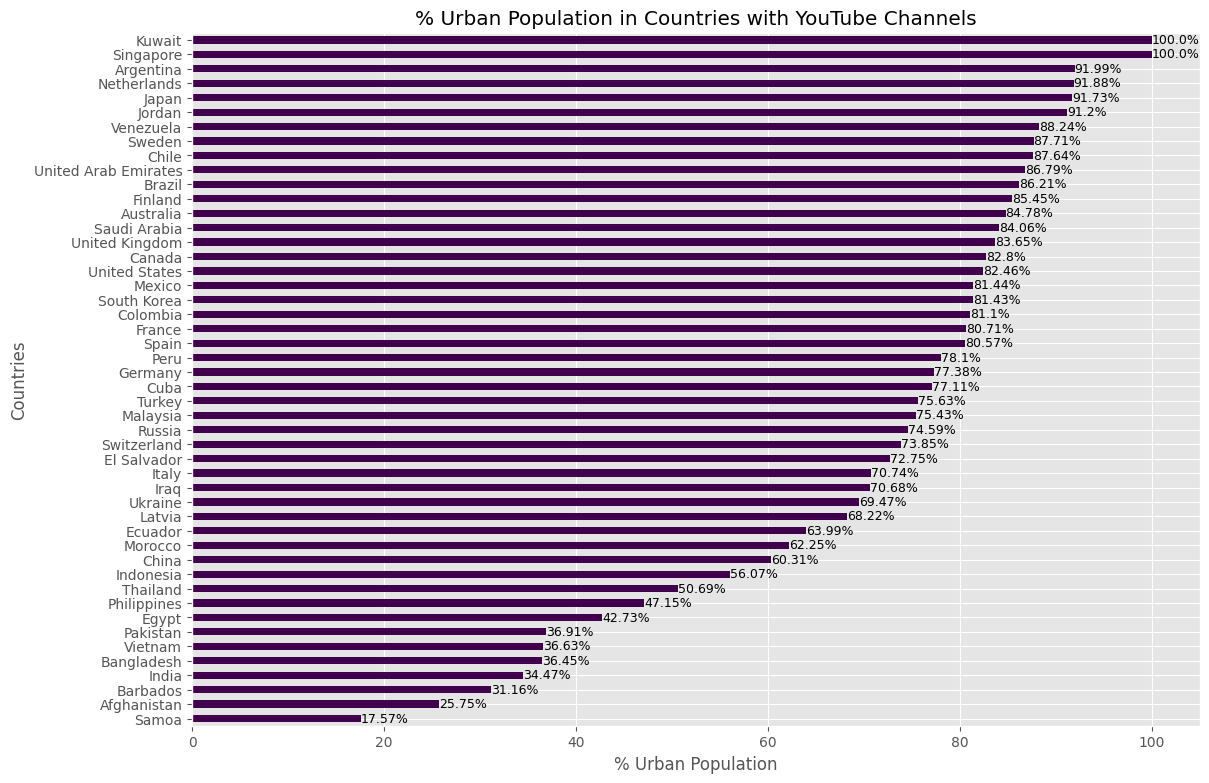

In [69]:
a.sort_values().plot(kind='barh', title='% Urban Population in Countries with YouTube Channels', 
                     colormap='PRGn', figsize=(13,9))

for i,j in enumerate(a.sort_values(ascending=False)):
    plt.text(j, 47-i, f"{round(j, 2)}%", va='center', fontsize=9, color='black')

plt.xlabel('% Urban Population')
plt.ylabel('Countries')
plt.show()

---

### 14. Are there any patterns in the distribution of YouTube channels based on latitude and longitude coordinates?

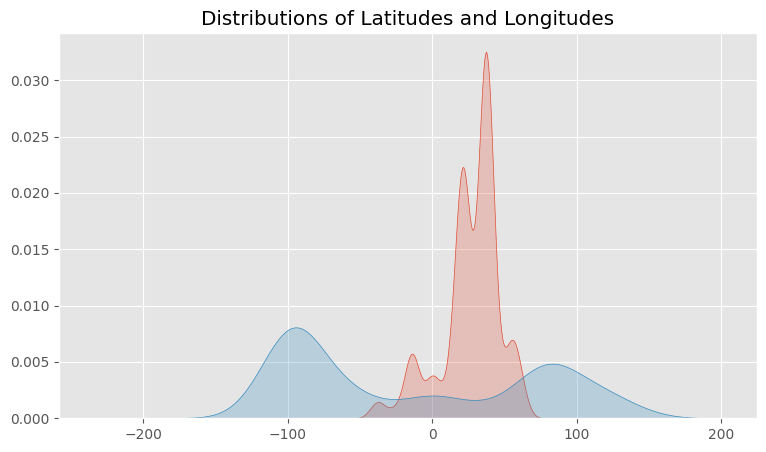

In [70]:
plt.figure(figsize=(9,5))
sns.kdeplot(df, x='Latitude', fill=True)
sns.kdeplot(df, x='Longitude', fill=True)
plt.title('Distributions of Latitudes and Longitudes')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Trying a simple Choropleth Map using Longitudes and Latitudes given..

In [71]:
# No. of YouTube channels in each Country
df['Country'].value_counts().to_frame().reset_index().head()

,Country,count
0,United States,337
1,India,200
2,Brazil,68
3,United Kingdom,46
4,Mexico,40


In [72]:
# Geographical position of each country
df[['Country', 'Longitude', 'Latitude']].drop_duplicates().head()

,Country,Longitude,Latitude
0,India,78.962880,20.593684
1,United States,-95.712891,37.090240
5,Japan,138.252924,36.204824
6,Russia,105.318756,61.524010
10,South Korea,127.766922,35.907757


In [73]:
# Joining the above 2 tables
a = pd.merge(left=df['Country'].value_counts().to_frame().reset_index(), 
             right=df[['Country', 'Longitude', 'Latitude']].drop_duplicates(), 
             how='inner')
a.head()

,Country,count,Longitude,Latitude
0,United States,337,-95.712891,37.090240
1,India,200,78.962880,20.593684
2,Brazil,68,-51.925280,-14.235004
3,United Kingdom,46,-3.435973,55.378051
4,Mexico,40,-102.552784,23.634501


In [74]:
import plotly.graph_objects as go

# Create a Scattergeo plot
fig = go.Figure(go.Scattergeo(
    mode = 'markers',
    lon = a['Longitude'],
    lat = a['Latitude'],
    text = a['Country'],
    marker=dict(
        size=10,
        color=a['count'],
        colorscale='RdYlGn',
        opacity=0.8,
        colorbar=dict(title='Number of YouTube Channels')
    )
))

# Update layout
fig.update_layout(title = 'Number of YouTube Channels by Country', 
                  geo=dict(showcoastlines=True, projection_type='equirectangular'))

fig.update_layout(title = 'Countries on World Map', 
                  geo_scope='world', width=1000, height=600)

fig.show()